## Wind spectra

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

# Filter the plot warning
warnings.filterwarnings( "ignore" )

###  Davenport Spectrum with Drag Coefficient

The Davenport spectrum in the original paper by Davenport can be expressed,

$$
\frac{nS(n)}{\kappa \Delta_{1}^{2}} = 4.0 \frac{x^{2}}{(1 + x^{2})^{4/3}}
$$

$$
x = \frac{1200n}{\Delta_{1}}
$$

where $S(n)$ is the power spectrum density ( $m^2 s^{-2} Hz^{-1}$ ); $n$ is the frequency; $\Delta_{1}$ is the velocity ( $m/s$ ) at standard reference height of 10 $m$; $\kappa$ is the drag coefficient referred to mean velocity at 10 $m$, default value = 0.005. 

The normalized power spectrum density is defined as
$$
\frac{nS(n)}{\kappa \Delta_{1}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{10n}{\Delta_{1}}
$$

The drag coefficient $\kappa$ is related to the surface type and some recommended values are given as


| Type of surface                                                                          | $\kappa$      |
| :--------------------------------------------------------------------------------------- | :------------ |
| Open unobstructed country <br /> (e.g., prairie-type grassland, arctic tundra, desert)          | 0.005         |
| Country broken by low clustered obstructions <br /> such as trees and houses$^*$ | 0.015 - 0.020 |
| Heavilly built-up urban centers with tall buildings                                      | 0.050         |

$^*$below 10 $m$ high

<br/>

Function `davenportSpectrumWithDragCoef` implements the Davenport spectrum in the original paper by Davenport.

Reference: 

* Davenport, A. G. (1961). The spectrum of horizontal gustiness near the ground in high winds. Quarterly Journal of the Royal Meteorological Society, 87(372), 194-211.

#### Function help

In [2]:
from ffpack.lsm import davenportSpectrumWithDragCoef
help( davenportSpectrumWithDragCoef )

Help on function davenportSpectrumWithDragCoef in module ffpack.lsm.windSpectra:

davenportSpectrumWithDragCoef(n, delta1, kappa=0.005, normalized=True)
    Davenport spectrum in the original paper by Davenport [Davenport1961]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    delta1: scalar
        Velocity ( m/s ) at standard reference height of 10 m.
    kappa: scalar, optional
        Drag coefficient referred to mean velocity at 10 m.  Default value 0.005 
        corresponding to open unobstructed country [Davenport1961]_.
        The recommended value for heavilly built-up urban centers with 
        tall buildings is 0.05. The recommended value for country broken by 
        low clustered obstructions is between 0.015 and 0.02. 
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rs

#### Example with default values

In [3]:
dsnRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [4]:
delta1 = 10
dsnResults = [ davenportSpectrumWithDragCoef( n, delta1, normalized=True ) 
               for n in dsnRange ]

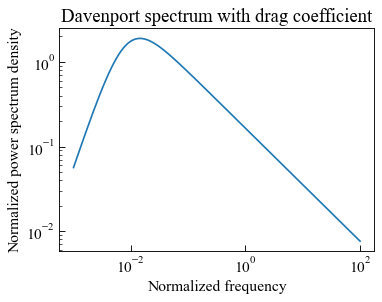

In [5]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsnRange ),
         np.array( dsnResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Davenport spectrum with drag coefficient" )

plt.tight_layout()
plt.show()

In [6]:
dsnfRange = [ 10**i for i in np.linspace( -6, 1, num=181 ) ]

In [7]:
delta1 = 10
dsnfResults = [ davenportSpectrumWithDragCoef( n, delta1, normalized=False ) 
                for n in dsnfRange ]

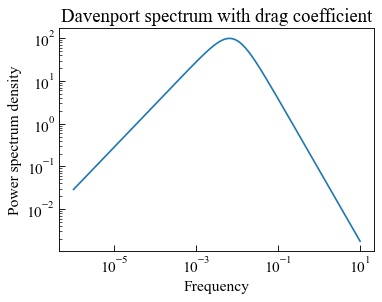

In [8]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsnfRange ),
         np.array( dsnfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "Davenport spectrum with drag coefficient" )

plt.tight_layout()
plt.show()

###  Davenport Spectrum with Roughness Length

The Davenport spectrum in the paper by Hiriart et al. can be expressed,

$$
\frac{nS(n)}{u_{f}^{2}} = 4.0 \frac{x^{2}}{(1 + x^{2})^{4/3}}
$$

$$
x = \frac{1200n}{u_{f}}
$$

where $S(n)$ is the power spectrum density ( $m^2 s^{-2} Hz^{-1}$ ); $n$ is the frequency; $u_{f}$ is the friction velocity ( $m/s$ ); $u_{z}$ is the mean wind speed ( $m/s$ ) measured at height $z$; $z$ is the height above the ground, default value = 10 $m$; $z_{0}$ is the roughness length, default value = 0.03 $m$ corresponding to open exposure case in NIST database. 

The friction velocity $u_{f}$ is calculated as
$$
u_{f} = \frac{ku_{z}}{ln(z/z_{0})}
$$
where $k$ is the von Karman's constant and $k=0.4$.

The normalized power spectrum density is defined as
$$
\frac{nS(n)}{u_{f}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{nz}{u_{f}}
$$

Function `davenportSpectrumWithRoughnessLength` implements the Davenport spectrum in the paper by Hiriart et al.

Reference: 

* Hiriart, D., Ochoa, J. L., & Garcia, B. (2001). Wind power spectrum measured at the San Pedro Mártir Sierra. Revista Mexicana de Astronomia y Astrofisica, 37(2), 213-220.
* Ho, T. C. E., Surry, D., & Morrish, D. P. (2003). NIST/TTU cooperative agreement-windstorm mitigation initiative: Wind tunnel experiments on generic low buildings. London, Canada: BLWTSS20-2003, Boundary-Layer Wind Tunnel Laboratory, Univ. of Western Ontario.

#### Function help

In [9]:
from ffpack.lsm import davenportSpectrumWithRoughnessLength
help( davenportSpectrumWithRoughnessLength )

Help on function davenportSpectrumWithRoughnessLength in module ffpack.lsm.windSpectra:

davenportSpectrumWithRoughnessLength(n, uz, z=10, z0=0.03, normalized=True)
    Davenport spectrum in the paper by Hiriart et al. [Hiriart2001]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    uz: scalar
        Mean wind speed ( m/s ) measured at height z.
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    z0: scalar, optional
        Roughness length ( m ), default to 0.03 m corresponding to open 
        exposure case in [Ho2003]_.
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ) when normalized=False.
        Normalized power spectrum density when normalized=True.
    
    Raises
    ------
    Value

#### Example with default values

In [10]:
dsrnRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [11]:
uz = 10
dsrnResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=True ) 
                for n in dsrnRange ]

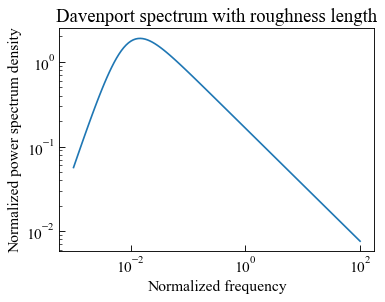

In [12]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsrnRange ),
         np.array( dsrnResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Davenport spectrum with roughness length" )

plt.tight_layout()
plt.show()

In [13]:
dsrnfRange = [ 10**i for i in np.linspace( -6, 1, num=181 ) ]

In [14]:
uz = 10
dsrnfResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=False ) 
                 for n in dsrnfRange ]

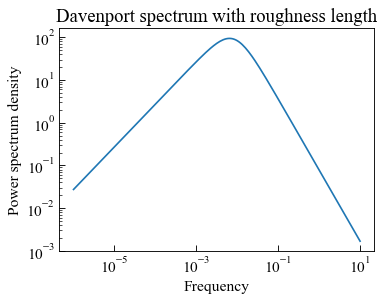

In [15]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsrnfRange ),
         np.array( dsrnfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "Davenport spectrum with roughness length" )

plt.tight_layout()
plt.show()

### EC1 spectrum

The EC1 spectrum is implemented according to Annex B in BS EN 1991-1-4:2005 Eurocode 1: Actions on structures. 

The wind distribution over frequencies is expressed by the non-dimensional power spectral density function $S_{L}(z,n)$, which should be determined as

$$
S_{L}(z,n) = \frac{nS(z,n)}{\sigma_{v}^{2}} = \frac{6.8 f_{L}(z,n)^{2}}{\left( 1 + f_{L}(z,n)^{2} \right)^{5/3}}
$$

$$
f_{L}(z,n) = \frac{nL(z)}{v_{m}(z)}
$$

where $S(z,n)$ is the one-sided variance spectrum ( $m^2 s^{-2} Hz^{-1}$ ); $f_{L}(z,n)$ is the a non-dimensional frequency determined by the frequency $n$, the natural frequency in $Hz$; $V_{m}$ is the mean velocity ( $m/s$ ); $L(z)$ is the turbulence length scale and is determined as

$$
\begin{aligned}
  L(z) = L_{t} \left( \frac{z}{z_{t}} \right)^{\alpha} \  \text{ for } \  z \geq z_{min} \\
  L(z) = L(z_{min}) \  \text{ for } \  z < z_{min}
\end{aligned}
$$

with a reference height of $z_{t} = 200 \  m$, a reference length scale of $L_{t} = 300 \  m$, and with $\alpha = 0.67 + 0.05 ln(z_{0})$, where the roughness length $z_{0}$ is in $m$. The minimum height $z_{min}$ is given in the following table,


|  Terrain category                                             |  $z_{0}$ (m)  |  $z_{min}$ (m) |
| :----------------------------------------------------------- | :------------- | :------------- | 
| 0 Sea or coastal area exposed to the open sea                | 0.003         | 1      |
| 1 Lakes or flat and horizontal area | 0.01 | 1      |
| 2 Area with low vegetation such as grass and isolated obstacles    | 0.05   | 2      |
| 3 Area with regular cover of vegetation or buildings or with isolated obstacles   | 0.3   | 5      |
| 4 Area in which at least 15 \% of the surface is covered with buildings | 1.0   | 10      |



<!-- |  Terrain category                                             |  $z_{0}$ (m)  |  $z_{min}$ (m) |
| :-----------------------------------------------------------: | :-------------: | :--------------: |
| 0 Sea or coastal area exposed to the open sea                | 0.003         | 1      |
| 1 Lakes or flat and horizontal area with negligible vegetation and without obstacles | 0.01 | 1      |
| 2 Area with low vegetation such as grass and isolated obstacles(trees, buildings) with separations of at least 20 obstacle heights    | 0.05   | 2      |
| 3 Area with regular cover of vegetation or buildings or with isolated obstacles with separations of maximum 20 obstacle heights (such as villages, suburban terrain, permanent forest)    | 0.3   | 5      |
| 4 Area in which at least 15 \% of the surface is covered with buildings and their average height exceeds 15 m  | 1.0   | 10      |
 -->
 
|  Terrain category  |  Description  |
| :------------------------ | :------------- |
| 0  | Sea or coastal area exposed to the open sea      |
| 1  | Lakes or flat and horizontal area with negligible vegetation and without obstacles      |
| 2  | Area with low vegetation such as grass and isolated obstacles(trees, buildings) with separations of at least 20 obstacle heights   |
| 3  | Area with regular cover of vegetation or buildings or with isolated obstacles with separations of maximum 20 obstacle heights (such as villages, suburban terrain, permanent forest)   |
| 4  | Area in which at least 15 \% of the surface is covered with buildings and their average height exceeds 15 m  |

<br/>

Function `ec1Spectrum` implements the spectrum in Eurocode 1.

Reference: 

* EN1991-1-4, 2005. Eurocode 1: Actions on structures.

#### Function help

In [16]:
from ffpack.lsm import ec1Spectrum
help( ec1Spectrum )

Help on function ec1Spectrum in module ffpack.lsm.windSpectra:

ec1Spectrum(n, uz, sigma=0.03, z=10, tcat=0, normalized=True)
    EC1 spectrum is implemented according to Annex B [EN1991-1-42005]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    uz: scalar
        Mean wind speed ( m/s ) measured at height z.
    sigma: scalar, optional
        Standard derivation of wind.  
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    tcat: scalar, optional
        Terrain category, could be 0, 1, 2, 3, 4
        Default to 0 (sea or coastal area exposed to the open sea) in EC1 Table 4.1.
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ) when normalized=False.
        Normalized power spectrum density w

#### Example with default values

In [17]:
ec1nRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [18]:
uz = 10
ec1nResults = [ ec1Spectrum( n, uz, normalized=True ) for n in ec1nRange ]

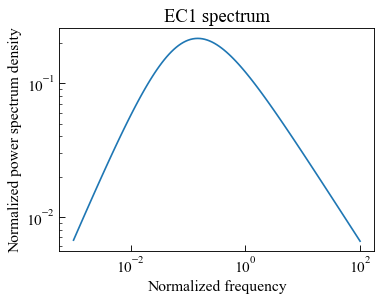

In [19]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( ec1nRange ),
         np.array( ec1nResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "EC1 spectrum" )

plt.tight_layout()
plt.show()

In [20]:
ec1nfRange = [ 10**i for i in np.linspace( -6, 1, num=181 ) ]

In [21]:
uz = 10
ec1nfResults = [ ec1Spectrum( n, uz, normalized=False ) for n in ec1nfRange ]

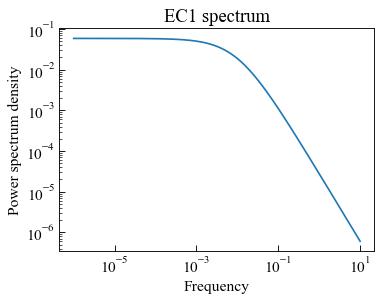

In [22]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( ec1nfRange ),
         np.array( ec1nfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "EC1 spectrum" )

plt.tight_layout()
plt.show()

### IEC spectrum

The IEC spectrum is implemented according to IEC 61400-1 (2005), which is a modified version of the Kaimal wind spectrum.

The component power spectral densities are given in non-dimensional form by the equation:

$$
\frac{f S_{k}(f)}{\sigma_{k}^{2}} = \frac{4 f L_{k} / V_{hub} }{\left( 1 + 6 f L_{k} / V_{hub} \right)^{5/3}}
$$

where $f$ is the frequency in $Hz$; $k$ is the index referring to the velocity component direction (i.e. 1 = longitudinal, 2 = lateral, and 3 = upward); $S_{k}$ is the single-sided velocity component spectrum; $\sigma_{k}$ is the velocity component standard deviation; $L_{k}$ is the velocity component integral scale parameter.

The turbulence spectral parameters are given in following table,


|                                 |      $k = 1$       |       $k = 2$        |      $k = 3$       |
| :------------------------------ | :----------------: | :------------------: | :----------------: |
| Standard deviation $\sigma_{k}$ |  $\sigma_{1}$      |  $0.8\sigma_{1}$     | $0.5\sigma_{1}$    |
| Integral scale $L_{k}$          |  $8.1\Lambda_{1}$  |  $2.7\Lambda_{1}$    | $0.66\Lambda_{1}$  |


where $\sigma_{1}$ and $\Lambda_{1}$ are the standard deviation and scale parameters, respectively, of the turbulence. The longitudinal turbulence scale parameter, $\Lambda_{1}$, at hub height $z$ shall be given by 

$$
\begin{aligned}
  \Lambda_{1} = 0.7z \  \text{ for } \  z \leq 60m  \\
  \Lambda_{1} = 42m  \  \text{ for } \  z > 60m
\end{aligned}
$$


The normalized power spectrum density is defined as
$$
\frac{f S_{k}(f)}{\sigma_{k}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{f L_{k} }{ V_{hub} }
$$


Function `iecSpectrum` implements the spectrum in IEC 61400-1.

Reference: 

* IEC, 2005. IEC 61400-1, Wind turbines - Part 1: Design requirements.

#### Function help

In [23]:
from ffpack.lsm import iecSpectrum
help( iecSpectrum )

Help on function iecSpectrum in module ffpack.lsm.windSpectra:

iecSpectrum(f, vhub, sigma=0.03, z=10, k=1, normalized=True)
    IEC spectrum is implemented according to [IEC2005]_.
    
    Parameters
    ----------
    f: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    vhub: scalar
        Mean wind speed ( m/s ).
    sigma: scalar, optional
        Standard derivation of the turblent wind speed component.  
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    k: scalar, optional
        Wind speed direction, could be 1, 2, 3
        ( 1 = longitudinal, 2 = lateral, and 3 = upward )
        Default to 1 (longitudinal).
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Single-sided velocity component power spectrum density ( m^2 s^-2 Hz^-1 ) 
        when normalized=False.
   

#### Example with default values

In [24]:
icenRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [25]:
vhub = 10
icenResults = [ iecSpectrum( f, vhub, normalized=True ) for f in icenRange ]

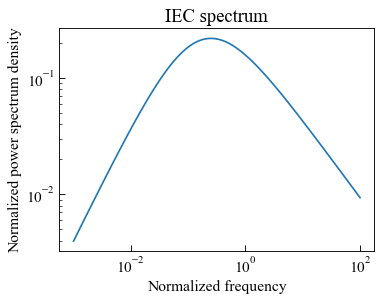

In [26]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( icenRange ),
         np.array( icenResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "IEC spectrum" )

plt.tight_layout()
plt.show()

In [27]:
iecnfRange = [ 10**i for i in np.linspace( -4, 2, num=141 ) ]

In [28]:
vhub = 10
iecnfResults = [ iecSpectrum( f, vhub, normalized=False ) for f in iecnfRange ]

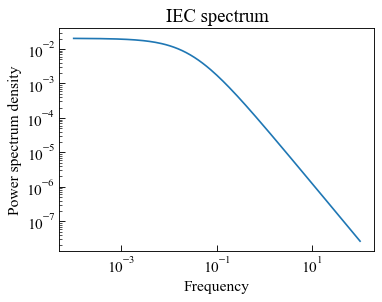

In [29]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( iecnfRange ),
         np.array( iecnfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "IEC spectrum" )

plt.tight_layout()
plt.show()

### API spectrum

The API spectrum is implemented according to API Recommended practice 2A-WSD (RP 2A-WSD).

The 1 point wind spectrum for the energy density of the longitudinal wind speed fluctuations can be expressed by

$$
S(f) = \frac{320 \left( \frac{U_0}{10} \right)^{2} \left( \frac{z}{10} \right)^{0.45} }{ \left( 1 + \tilde{f}^{n} \right)^{ \left( \frac{5}{3n} \right) }}
$$

$$
\tilde{f} = 172 f \left( \frac{z}{10} \right)^{2/3} \left( \frac{U_0}{10} \right)^{-0.75} 
$$

where $n=0.468$; $f$ is the frequency ($Hz$); $S(f)$ is the spectral energy density at frequency ($m^2 s^{-2} Hz^{-2}$); $z$ is the height above sea level ($m$); $U_{0}$ is the 1 hour mean wind speed at 10 $m$ above sea level ($m/s$).


Function `apiSpectrum` implements the spectrum in API 2007.

Reference: 

* API, 2007. Recommended practice 2A-WSD (RP 2A-WSD): Recommnded practice for planning, designing and constructing fixed offshore platforms - working stress design.

#### Function help

In [30]:
from ffpack.lsm import apiSpectrum
help( apiSpectrum )

Help on function apiSpectrum in module ffpack.lsm.windSpectra:

apiSpectrum(f, u0, z=10)
    API spectrum is implemented according to [API2007]_.
    
    Parameters
    ----------
    f: scalar
        Frequency ( Hz ).
    u0: scalar
        1 hour mean wind speed ( m/s ) at 10 m above sea level.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ).
    
    Raises
    ------
    ValueError
        If n is not a scalar.
        If uz is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import apiSpectrum
    >>> f = 2
    >>> u0 = 10
    >>> rst = apiSpectrum( f, u0 )
    
    References
    ----------
    .. [API2007] API, 2007. Recommended practice 2A-WSD (RP 2A-WSD): 
       Recommnded practice for planning, designing and constructing fixed offshore 
       platforms - working stress design.



#### Example with default values

In [31]:
apifRange = [ 10**i for i in np.linspace( -6, 2, num=191 ) ]

In [32]:
u0 = 10
apifResults = [ apiSpectrum( f, u0 ) for f in apifRange ]

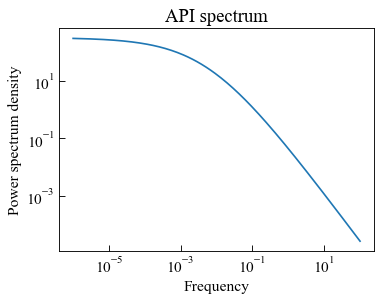

In [33]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( apifRange ),
         np.array( apifResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "API spectrum" )

plt.tight_layout()
plt.show()

### Wind spectra comparison

In [34]:
wdRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [35]:
delta1 = 10
dsnResults = [ davenportSpectrumWithDragCoef( n, delta1, normalized=True )
               for n in wdRange ]

In [36]:
uz = 10
dsrnResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=True )
                for n in wdRange ]

In [37]:
uz = 10
ec1nResults = [ ec1Spectrum( n, uz, normalized=True ) for n in wdRange ]

In [38]:
vhub = 10
icenResults = [ iecSpectrum( f, vhub, normalized=True ) for f in wdRange ]

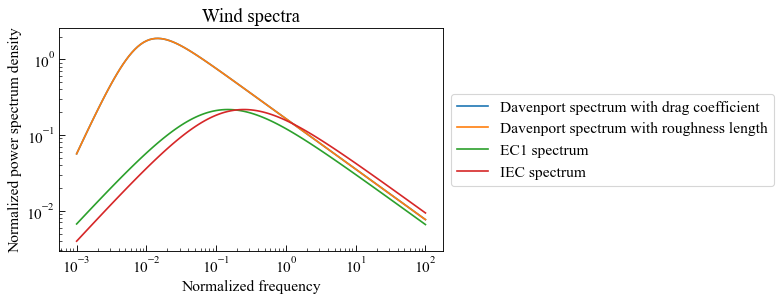

In [39]:
fig, ax = plt.subplots( figsize=(10, 4) )
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsnRange ),
         np.array( dsnResults ),
         label="Davenport spectrum with drag coefficient" )
ax.plot( np.array( dsrnRange ),
         np.array( dsrnResults ),
         label="Davenport spectrum with roughness length" )
ax.plot( np.array( ec1nRange ),
         np.array( ec1nResults ),
         label="EC1 spectrum" )
ax.plot( np.array( icenRange ),
         np.array( icenResults ),
         label="IEC spectrum" )


ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Wind spectra" )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()